In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [5]:
mu = -0.005
tau = 0.04
sigma = 10

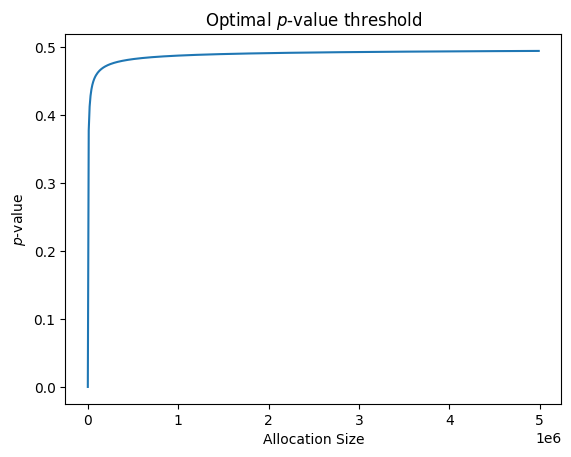

In [6]:
xs = np.arange(1,5e6,1e4)
plt.plot(xs, 1 - norm.cdf(-mu*sigma/(tau**2*np.sqrt(xs))))
plt.xlabel("Allocation Size")
plt.ylabel("$p$-value")
plt.title("Optimal $p$-value threshold")
plt.show()

In [15]:
## monte carlo approach to calculating false positive rate.
mc_samples = int(1e7)
deltas = np.random.normal(mu,tau,mc_samples)
deltas = deltas[deltas < 0]

ns = np.arange(1,5e6,5e4)
res = np.zeros_like(ns)
for i in range(len(ns)):
    n = ns[i]
    res[i] = np.sum(norm.cdf(mu*sigma/(np.sqrt(n)*tau**2) + np.sqrt(n)*deltas/(sigma**2)))/mc_samples

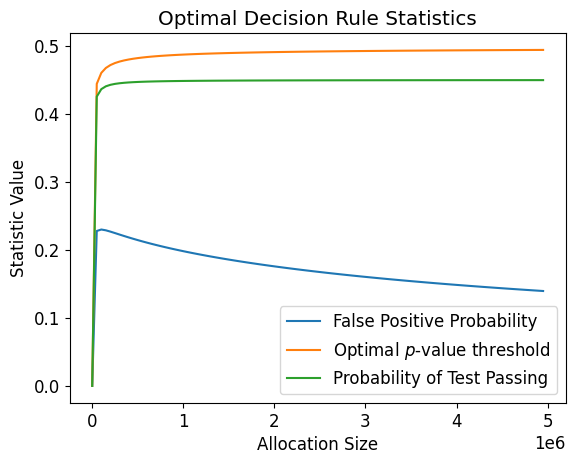

In [16]:

plt.rcParams['font.size'] = 12

fpr =  res
passing = norm.cdf(mu*np.sqrt((tau**2 + sigma**2/ns))/tau**2)
plt.plot(ns, fpr, label = "False Positive Probability")
plt.plot(ns, 1 - norm.cdf(-mu*sigma/(tau**2*np.sqrt(ns))), label =  "Optimal $p$-value threshold")
plt.plot(ns, passing, label =  "Probability of Test Passing")

plt.xlabel("Allocation Size")
plt.ylabel("Statistic Value")
plt.title(f"Optimal Decision Rule Statistics")
plt.legend()
